<ipython-input-1-275e48eb13e6>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-1-275e48eb13e6>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


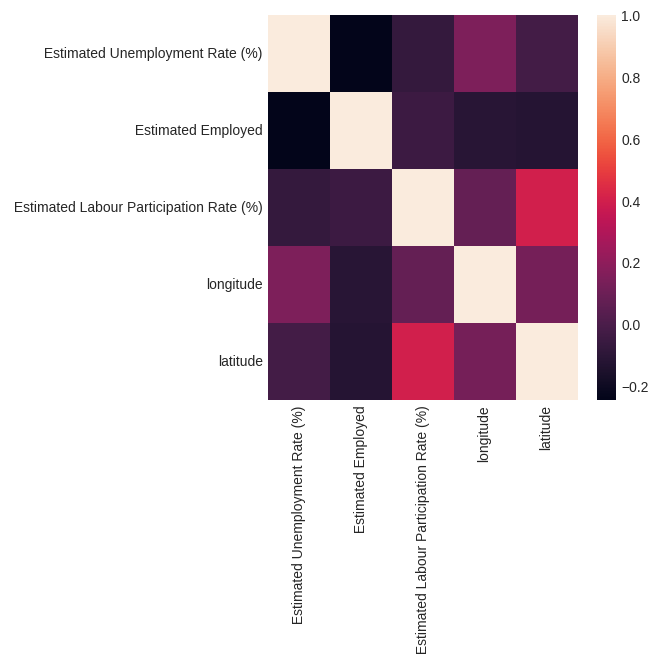

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unemployment Rate          267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/unemployment.csv')  # read file
data
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5, 5))
sns.heatmap(data.corr())
plt.show()

data.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region",
               "longitude","latitude"]
data.info()

In [2]:
print(data.isnull().sum())

States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
longitude                              0
latitude                               0
dtype: int64


In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unemployment Rate          267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


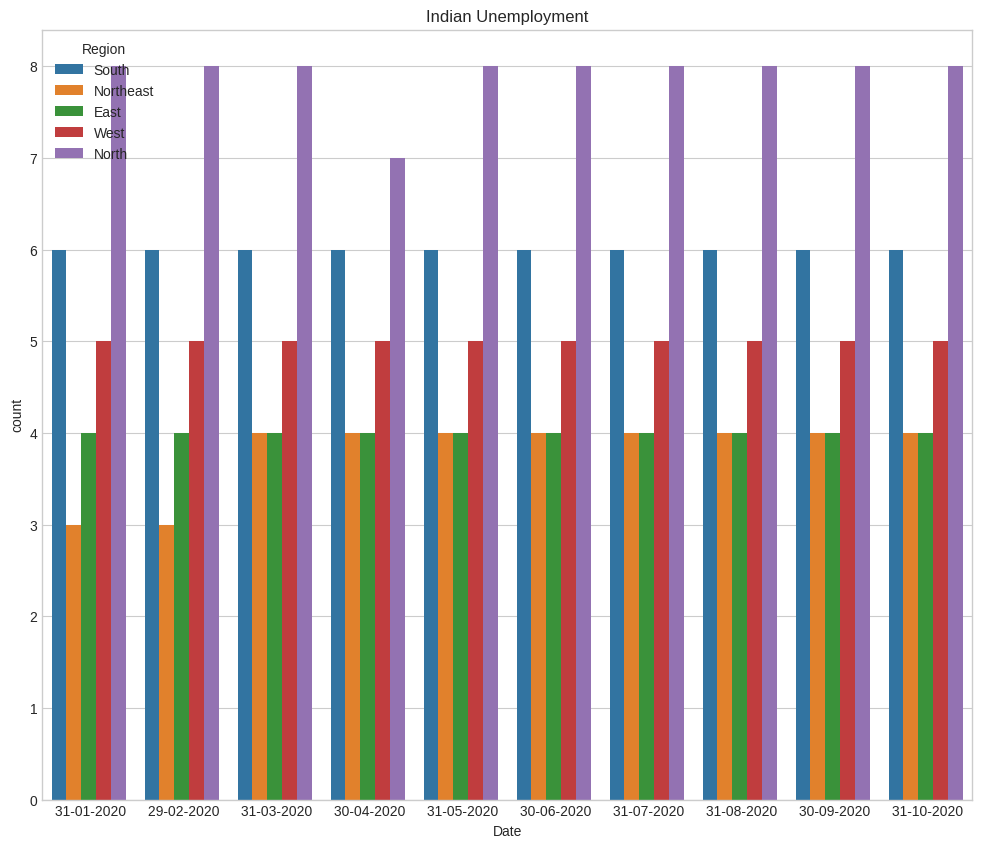

In [ ]:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.countplot(x="Date", hue="Region", data=data)
plt.show()

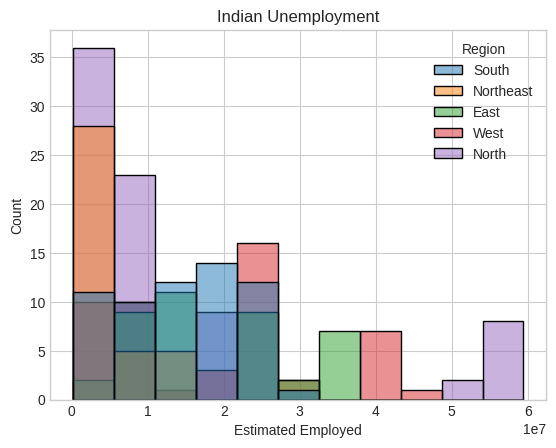

In [ ]:
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=data)
plt.show()

In [ ]:
import plotly.express as px
unemploment = data[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemploment, path=["Region", "States"],
                     values="Estimated Unemployment Rate",
                     width=700, height=700, color_continuous_scale="RdY1Gn",
                     title="Unemployment Rate in India")
figure.show()

In [ ]:
fig = px.box(data,x='States',y='Estimated Unemployment Rate',color='States',title='Unemployment rate',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
fig = px.scatter_matrix(data,template='plotly',
    dimensions=['Estimated Unemployment Rate','Estimated Employed',
                'Estimated Labour Participation Rate'],
    color='Region')
fig.show()

In [ ]:
plot_ump = data[['Estimated Unemployment Rate','States']]

data_unemp = plot_ump.groupby('States').mean().reset_index()

data_unemp = data_unemp.sort_values('Estimated Unemployment Rate')

fig = px.bar(data_unemp, x='States',y='Estimated Unemployment Rate',color='States',
            title='Average Unemployment Rate in each state',template='plotly')

fig.show()

In [ ]:
fig = px.bar(data, x='Region',y='Estimated Unemployment Rate',animation_frame = 'Date',color='States',
            title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700,template='plotly')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.show()


In [ ]:
data.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.000000,12.236929,10.803283,0.500000,4.845000,9.650000,16.755000,75.850000
Estimated Employed,267.000000,13962105.722846,13366318.359733,117542.000000,2838930.500000,9732417.000000,21878686.000000,59433759.000000
Estimated Labour Participation Rate,267.000000,41.681573,7.845419,16.770000,37.265000,40.390000,44.055000,69.690000
longitude,267.000000,22.826048,6.270731,10.850500,18.112400,23.610200,27.278400,33.778200
latitude,267.000000,80.532425,5.831738,71.192400,76.085600,79.019300,85.279900,92.937600


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[['Estimated Employed', 'Estimated Labour Participation Rate']]
y = data['Estimated Unemployment Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R²) Score: {r2}')


Mean Squared Error: 84.87849877429973
R-squared (R²) Score: 0.07659555570062615


In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=0)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
print(f'Random Forest Regression - Mean Squared Error: {random_forest_mse}, R-squared (R²) Score: {random_forest_r2}')

Random Forest Regression - Mean Squared Error: 69.34041719833334, R-squared (R²) Score: 0.24563640574306334


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

categorical_features = ['States', 'Region']
numeric_features = [
    'Estimated Employed',
    'Estimated Labour Participation Rate',
    'longitude',
    'latitude'
]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X = data[numeric_features + categorical_features]
y = data['Estimated Unemployment Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=0)
random_forest_model.fit(X_train, y_train)


random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)

print(f'Random Forest Regression - Mean Squared Error: {random_forest_mse}, R-squared (R²) Score: {random_forest_r2}')



Random Forest Regression - Mean Squared Error: 65.79147648296295, R-squared (R²) Score: 0.2842458024271656
